In [2]:
import numpy as np
from PIL import Image

In [16]:
# base image
img = Image.open("assets/cat-8578562_640.jpg").convert("L")
img = np.asarray(img)

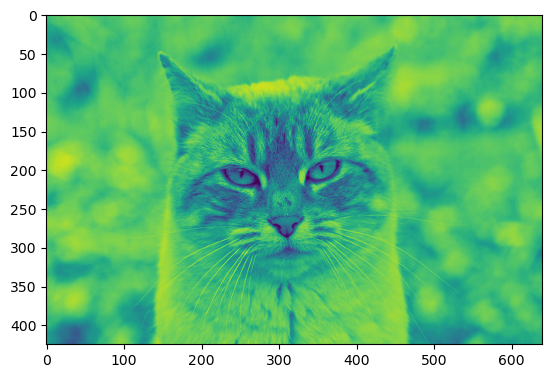

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [29]:
def low_rank_approx(img, rank):
    u, s, vt = np.linalg.svd(img)
    s[rank+1:] = 0
    sigma = np.zeros((u.shape[1], vt.shape[0]))
    np.fill_diagonal(sigma, s)
    return u @ sigma @ vt

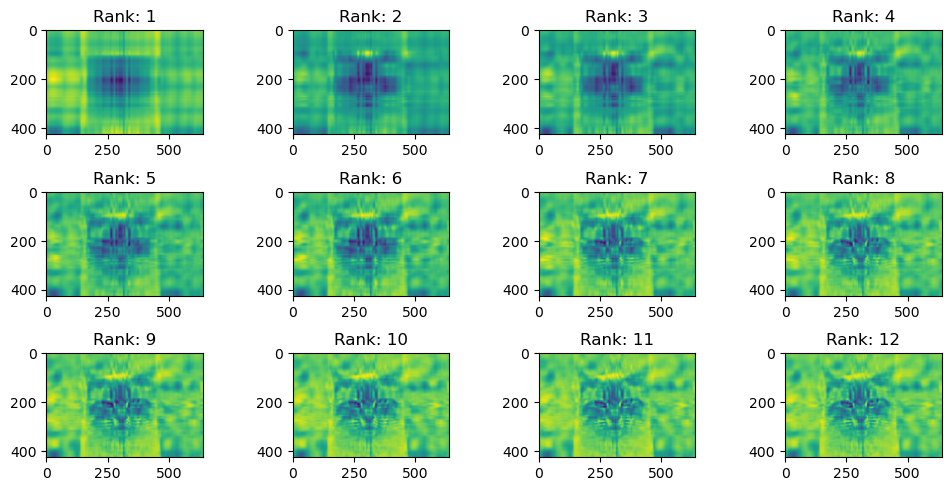

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.ravel(), start=1):
    ax.imshow(low_rank_approx(img, i))
    ax.set_title(f"Rank: {i}")
fig.tight_layout()

In [37]:
def basis_vector(img, i):
    u, _, vt = np.linalg.svd(img)
    sigma = np.zeros((u.shape[1], vt.shape[0]))
    sigma[i, i] = 1.0
    return u @ sigma @ vt

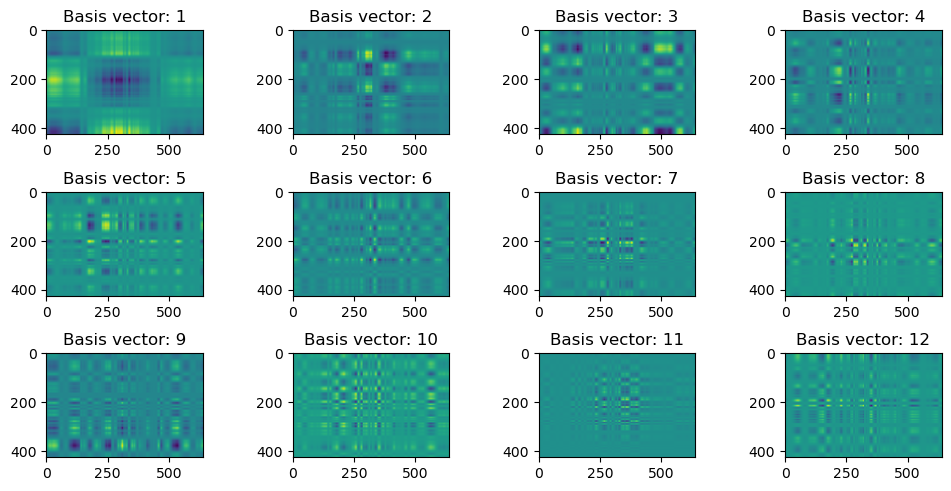

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.ravel(), start=1):
    ax.imshow(basis_vector(img, i))
    ax.set_title(f"Basis vector: {i}")
fig.tight_layout()

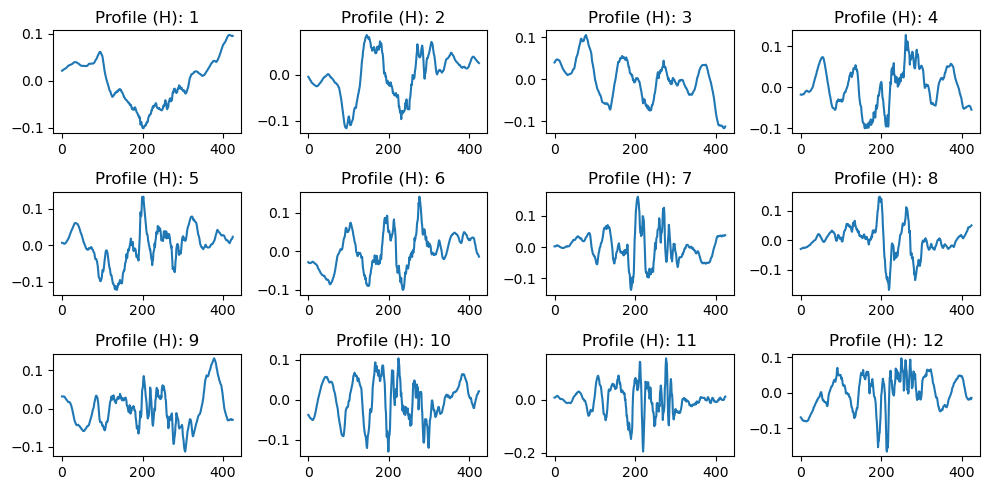

In [42]:
def basis_vector_linear(img, i):
    u, _, vt = np.linalg.svd(img)
    return u[:, i], vt[i, :]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.ravel(), start=1):
    u_vec, _ = basis_vector_linear(img, i)
    ax.plot(u_vec)
    ax.set_title(f"Profile H: {i}")
fig.tight_layout()

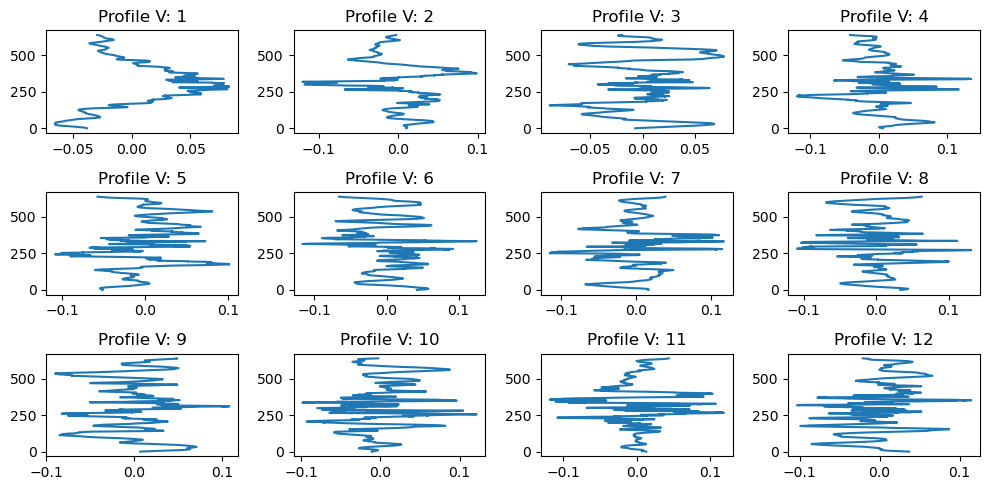

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes.ravel(), start=1):
    _, v_vec = basis_vector_linear(img, i)
    ax.plot(v_vec, np.arange(len(v_vec)))
    ax.set_title(f"Profile V: {i}")
fig.tight_layout()

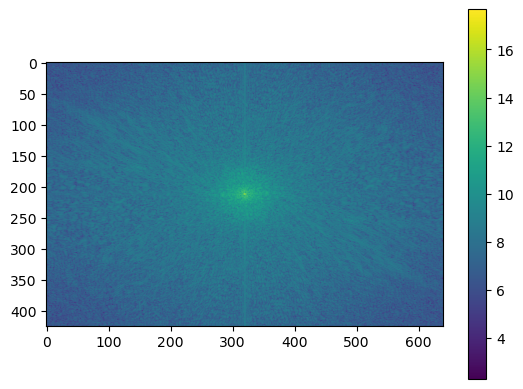

In [57]:
# low rank spectrum

f = np.fft.fft2(img)
f = np.fft.fftshift(f)
plt.imshow(np.log1p(np.abs(f)))
plt.colorbar()

(array([1.06000e+02, 2.41400e+03, 4.06220e+04, 1.63977e+05, 5.97440e+04,
        4.53600e+03, 5.62000e+02, 3.80000e+01, 0.00000e+00, 1.00000e+00]),
 array([ 2.29885937,  3.83550925,  5.37215914,  6.90880902,  8.44545891,
         9.98210879, 11.51875868, 13.05540856, 14.59205845, 16.12870834,
        17.66535822]),
 <BarContainer object of 10 artists>)

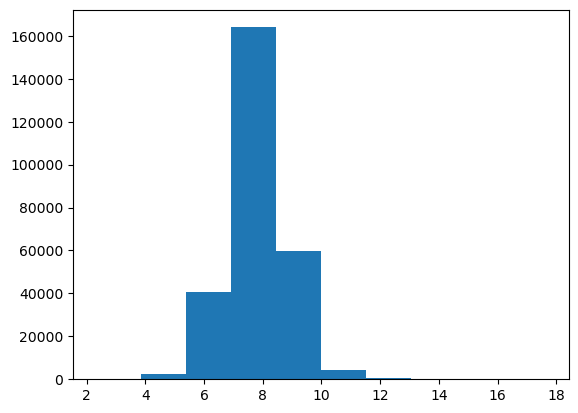

In [60]:
plt.hist(np.log1p(np.abs(f)).flatten())

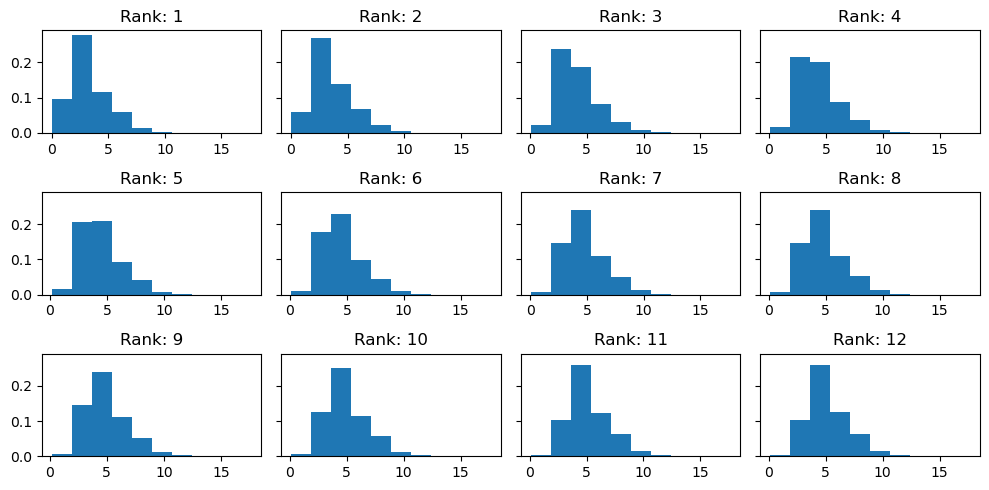

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 5), sharey=True)
for i, ax in enumerate(axes.ravel(), start=1):
    f = np.fft.fft2(low_rank_approx(img, i))
    f = np.fft.fftshift(f)
    log_freqs = np.log1p(np.abs(f)).flatten()
    ax.hist(log_freqs, density=True)
    ax.set_title(f"Rank: {i}")
fig.tight_layout()